In [145]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [146]:
from fastai import *
from fastai.vision import *

from PIL import Image
from IPython.display import Image, HTML, display

In [147]:
train = pd.read_csv('./data/Kannada/train.csv')
test = pd.read_csv('./data/Kannada/test.csv')
validation = pd.read_csv('./data/Kannada/Dig-MNIST.csv')

In [6]:
tables = [train,test,validation]
for t in tables: 
    display(t.head(3))
    print(t.shape)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000, 785)


,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(5000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10240, 785)


In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


In [149]:
path = Path('./data/Kannada/')
os.makedirs(f'{path}/train', exist_ok=True)
os.makedirs(f'{path}/test', exist_ok=True)
os.makedirs(f'{path}/validation', exist_ok=True)

In [161]:
arr = train.iloc[1, 1:].values
print(arr.shape)
arr = arr.reshape(28,28).astype(np.uint8)
print(arr.shape)

(784,)
(28, 28)


In [164]:
from PIL import Image as PIL_img

def get_images_labels(df, out_folder):
    arr = df.iloc[:,1:].values
    arr = [i.reshape(28,28).astype(np.uint8) for i in arr]
    labels = df.iloc[:,:1].values.flatten()
    fname_lst = []
    os.makedirs(f'{path}/{out_folder}', exist_ok=True)
    for idx,val in enumerate(arr):
        fname = f'{path}/{out_folder}/{idx}.png' 
        img = PIL_img.fromarray(val)
        img.save(fname)
        fname_lst.append(f'{out_folder}/{idx}.png')
    labels_list = list(zip(fname_lst,labels))
    return(labels_list)

In [165]:
%time train_labels = get_images_labels(train, 'train' )

CPU times: user 7.22 s, sys: 1.38 s, total: 8.6 s
Wall time: 8.61 s


In [166]:
%time test_labels = get_images_labels(test, 'test' )

CPU times: user 624 ms, sys: 88 ms, total: 712 ms
Wall time: 712 ms


In [167]:
%time vali_labels = get_images_labels(validation, 'validation' )

CPU times: user 1.28 s, sys: 212 ms, total: 1.5 s
Wall time: 1.5 s


In [168]:
train_label_df = pd.DataFrame(train_labels[:], columns = ['name', 'label']) 
test_label_df = pd.DataFrame(test_labels[:], columns = ['name', 'label']) 
vali_label_df = pd.DataFrame(vali_labels[:], columns = ['name', 'label']) 

In [169]:
train_label_df.head()

,name,label
0,train/0.png,0
1,train/1.png,1
2,train/2.png,2
3,train/3.png,3
4,train/4.png,4


In [170]:
train_label_df.to_csv(f'{path}/train_label.csv',index=False)
test_label_df.to_csv(f'{path}/test_label.csv',index=False)
vali_label_df.to_csv(f'{path}/validation_label.csv',index=False)

! ls {path}

Dig-MNIST.csv	       test.csv		train_valid_label.csv
sample.jpg	       test_label.csv	validation
sample.png	       train		validation_label.csv
sample_submission.csv  train.csv
test		       train_label.csv


In [171]:
labels_df = [train_label_df,vali_label_df,test_label_df]

In [172]:
train_vali_labels =  pd.concat([train_label_df,vali_label_df])
train_vali_labels.to_csv(f'{path}/train_valid_label.csv',index=False)
train_vali_labels.shape

(70240, 2)

In [174]:
# tfms = get_transforms(do_flip=False )

# data = (ImageList.from_folder(path) 
#         .split_by_folder(train='train', valid='validation')          
#         .label_from_df(all_labels)        
#         .add_test_folder()          
#         .transform(tfms, size=64)   
#         .databunch())

In [175]:
tfms = get_transforms(do_flip=False )

data = (ImageList.from_csv(path,'train_valid_label.csv')
       .split_by_rand_pct(0.2)
       .label_from_df()
       .transform(tfms, size=128)
       .databunch(bs=12)
       .normalize(imagenet_stats))

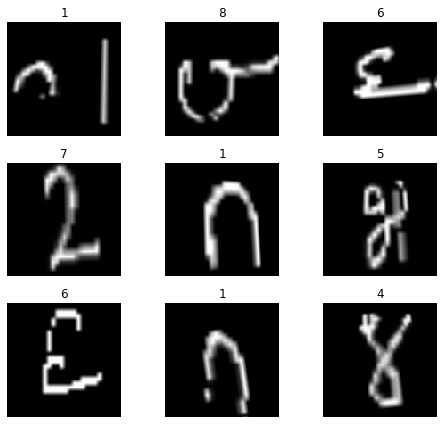

In [176]:
data.show_batch(rows=3, figsize=(7,6))

In [180]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 10, 56192, 14048)

In [181]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [179]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.298368,0.134417,0.035877,04:20
1,0.104020,0.054856,0.016444,04:02
2,0.089354,0.042128,0.012528,04:11
3,0.091623,0.038902,0.011461,04:09


In [182]:
learn.save('stage-1')

In [183]:
learn.unfreeze()

In [184]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


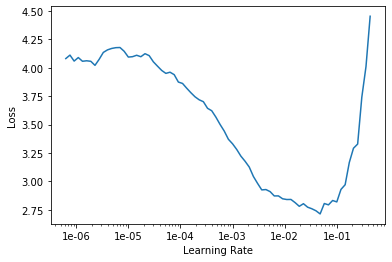

In [185]:
learn.recorder.plot()

In [186]:
learn.fit_one_cycle(4, max_lr=slice(3e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.165284,0.095972,0.021711,05:34
1,0.092324,0.074338,0.013596,05:34
2,0.052926,0.035853,0.009040,05:35
3,0.032642,0.060296,0.007118,05:47


In [187]:
learn.save('stage-2')

In [188]:
data = (ImageList.from_csv(path,'train_valid_label.csv')
       .split_by_rand_pct(0.2)
       .label_from_df()
       .transform(tfms, size=64)
       .databunch(bs=15)
       .normalize(imagenet_stats))

learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.050245,0.034716,0.008471,05:44
1,0.016878,0.022823,0.005481,05:39


In [210]:
learn.save('stage-3')

In [208]:
sub_df = pd.DataFrame(columns=['id','label'])
for i in range(test.shape[0]):
    img = open_image(f'{path}/test/{i}.png')
    pred_class,pred_idx,outputs = learn.predict(img)
    sub_df.loc[i]=[i,int(pred_class)]

In [211]:
sub_df.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [213]:
sub_df.to_csv(f'{path}/submission_24Sept2019.csv', index=False)

In [214]:
!ls {path}

Dig-MNIST.csv		   test.csv	    train_valid_label.csv
models			   test_label.csv   validation
sample_submission.csv	   train	    validation_label.csv
submission_24Sept2019.csv  train.csv
test			   train_label.csv


In [215]:
!ls {path}/models

stage-1.pth  stage-2.pth  stage-3.pth  tmp.pth
